# SOLUTION Plotting With Pandas Exercise
This set of exercises will require you to use Pandas' plotting functionality alongside some matplotlib methods.  

* **All charts use the `billboard_charts.csv` dataset.**  
* **Import that dataset and parse the `date` column as a date.**
* **Use the matplotlib theme `ggplot`**

## Part 1

Create the bar plot seen in the image below.  It visualizes the top 10 artists who have spent the most weeks at number 1 in the dataset.

* Notice the customized title
* The figure is 8x6
* Add in the x-axis label
* The plot uses the ggplot matplotlib theme
* The bars have a black edge with a width of 3.  You'll need to add that in yourself!

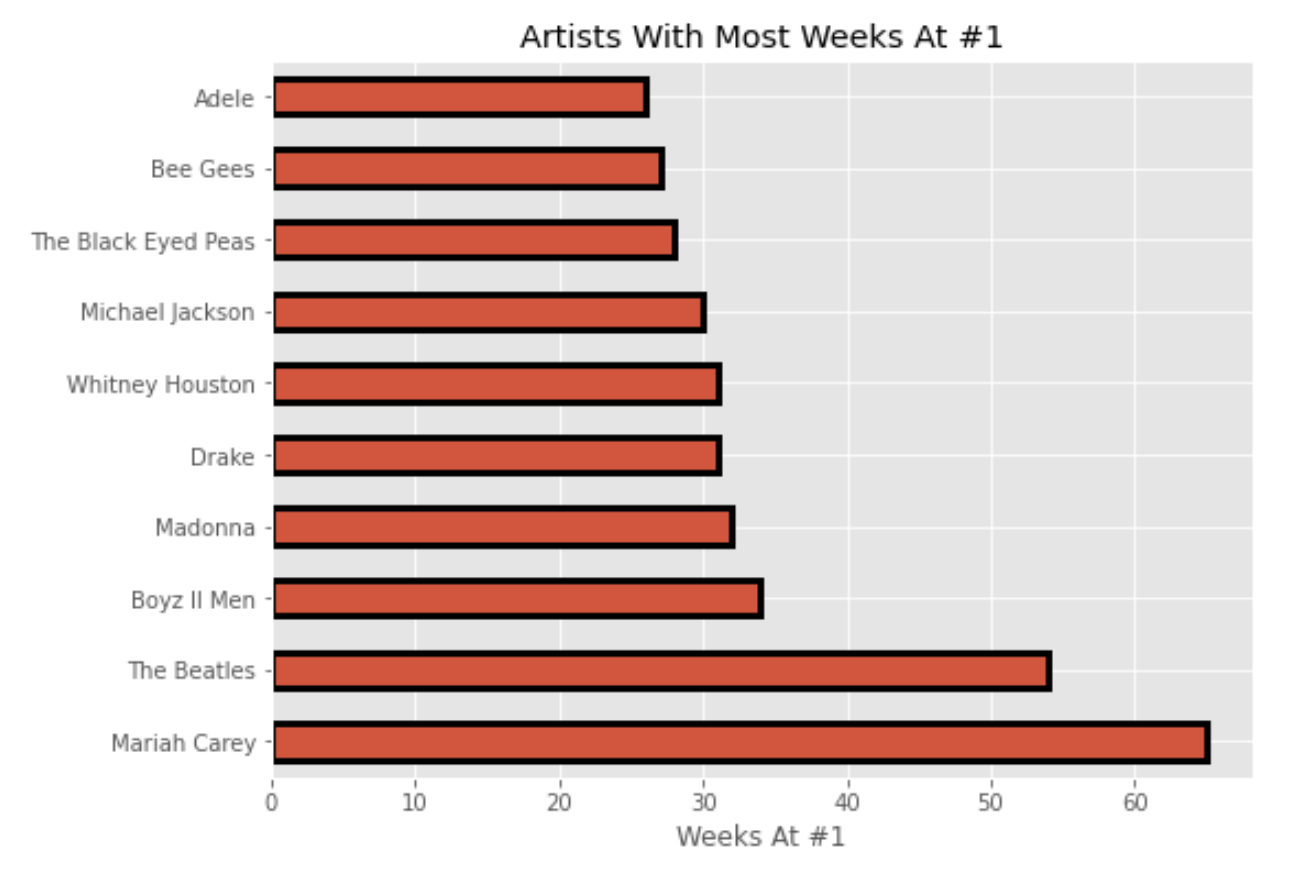

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
plt.style.use("ggplot")

In [4]:
billboard = pd.read_csv("data/billboard_charts.csv", parse_dates=["date"])

Text(0.5, 0, 'Weeks At #1')

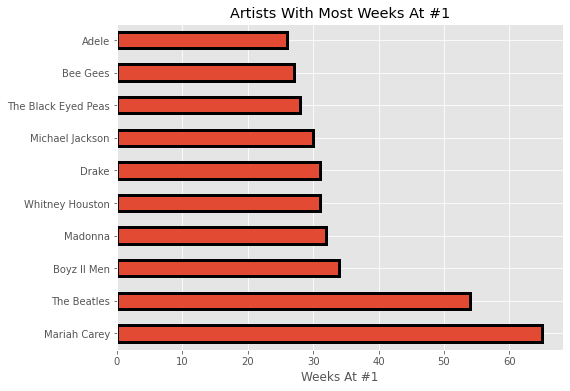

In [30]:
top_10 = billboard[billboard["rank"] == 1]["artist"].value_counts().head(10)

top_10.plot(
    kind="barh",
    title="Artists With Most Weeks At #1",
    figsize=(8,6),
    edgecolor="black",
    linewidth=3
)
plt.xlabel("Weeks At #1")

## Part 2

Please create the pie chart seen in the image below.  It visualizes the various artists who charted with the song "Please Mr. Postman".  

* Add in the custom title
* Use this list of colors: `colors = ["#6c5ce7","#00cec9", "#74b9ff"]`
* Explode the "Gentle Persuasion" slice by 0.1

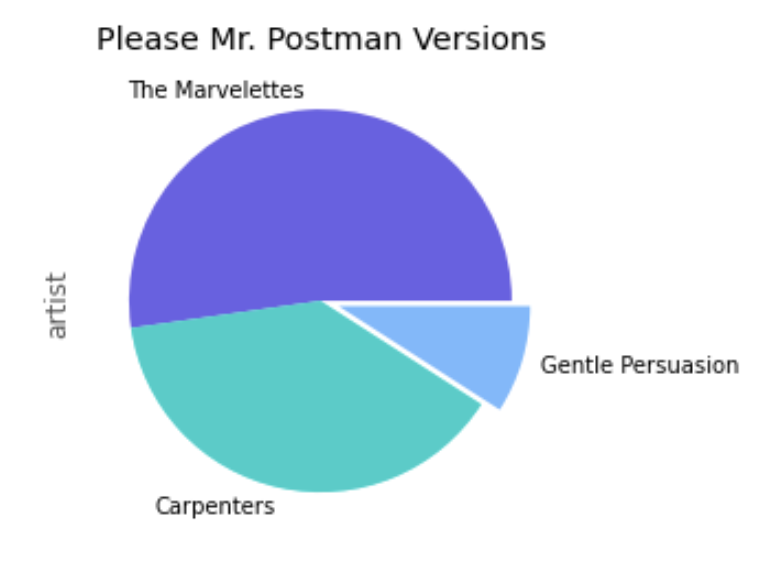

In [36]:
artists = billboard[billboard["song"] == "Please Mr. Postman"]["artist"].value_counts()

<AxesSubplot:title={'center':'Please Mr. Postman Versions'}, ylabel='artist'>

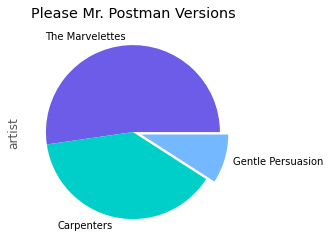

In [42]:
colors = ["#6c5ce7","#00cec9", "#74b9ff"]
artists.plot(
    kind="pie", 
    colors=colors, 
    explode=(0,0,0.1),
    title="Please Mr. Postman Versions"
)

## Part 3
Create the line plot seen in the image below. It visualizes the performance of the song "Blinding Lights"

* The figure is 9x5
* The line color is `#a29bfe`
* To invert the y-axis (so that rank 1 is the highest value), use: `plt.gca().invert_yaxis()`

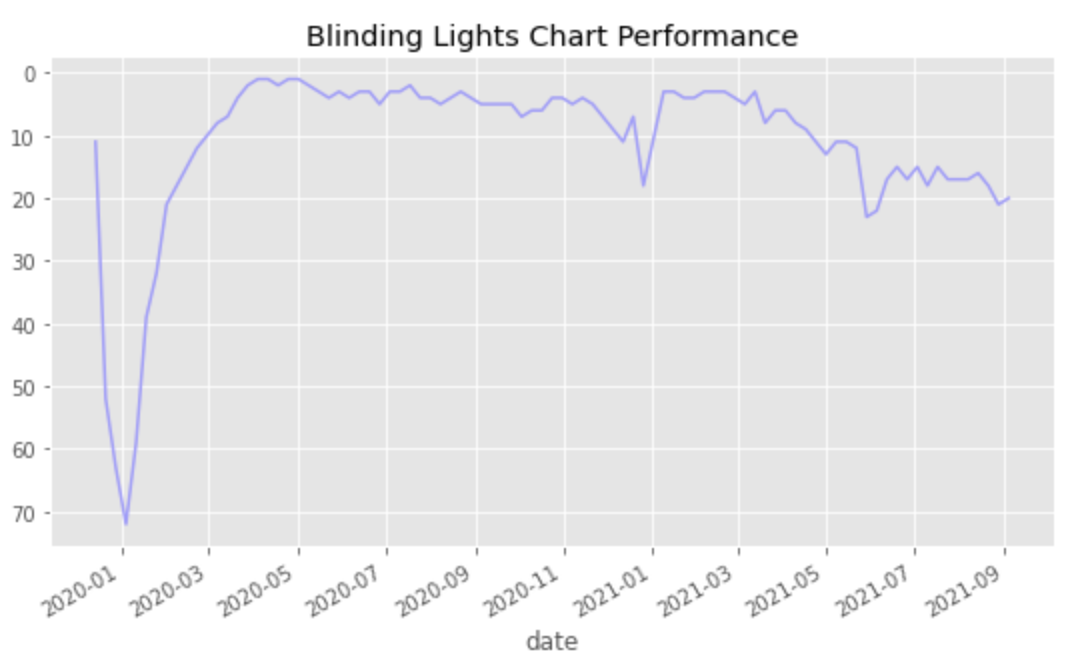

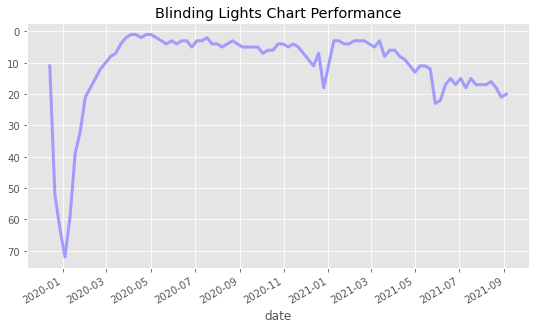

In [60]:
billboard[billboard["song"] == "Blinding Lights"].set_index("date")["rank"].plot(
    figsize=(9,5),
    title="Blinding Lights Chart Performance",
    color="#a29bfe",
    linewidth=3
)
plt.gca().invert_yaxis()

## Part 4

Create the line plot seen in the image below.  It shows the chart performance (rank) of the following songs:

* All I Want For Christmas Is You by Mariah Carey
* Rockin' Around The Christmas Tree by Brenda Lee
* Jingle Bell Rock by Bobby Helms

**The date range spans from 2016-12-25 to 2021-01-01**

Notice the customized x-axis tick marks, the legend, the title, and the axis labels! Also the figure is `10x7`

To invert the y-axis, use `plt.gca().invert_yaxis()`

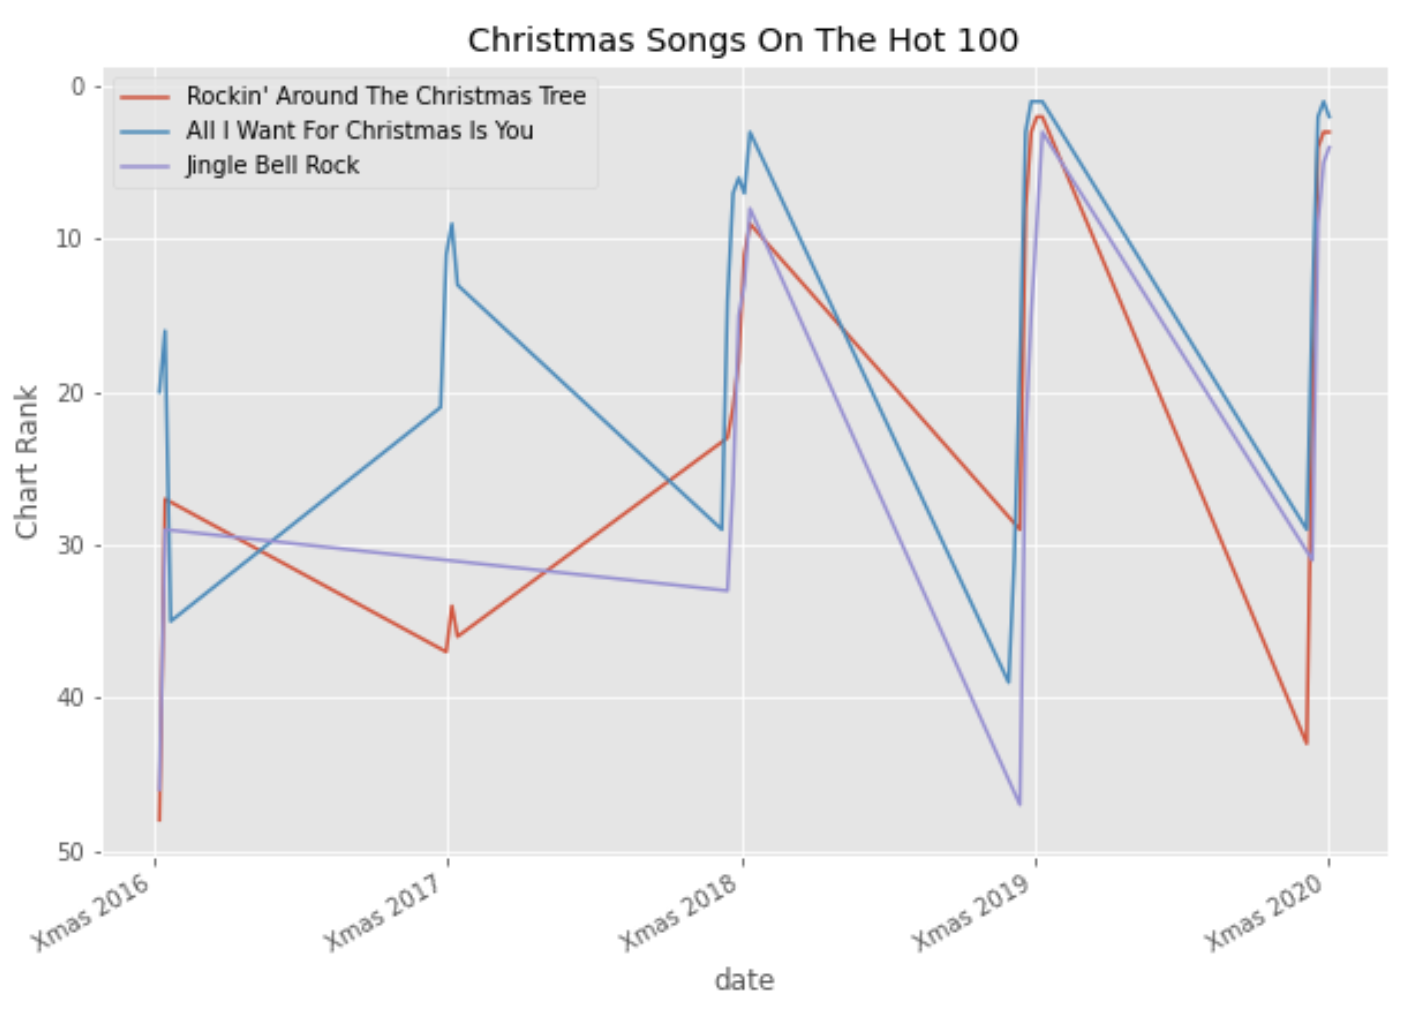

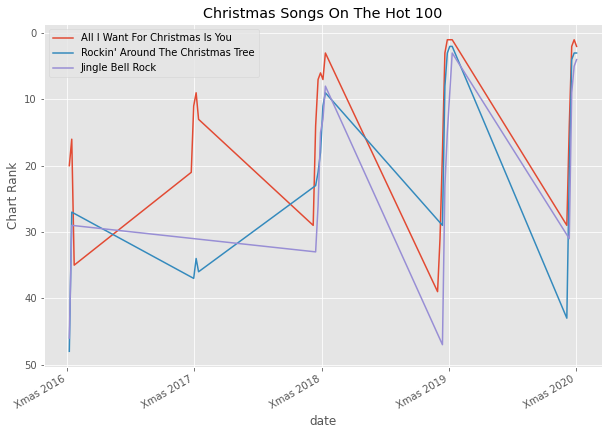

In [99]:
# 2016-12-25 to 2021-01-01
plt.figure(figsize=(10,7))
df = billboard[billboard["date"].between("2016-12-25", "2021-01-01")].set_index("date")
all_i_want = df[df["song"] == "All I Want For Christmas Is You"]
all_i_want["rank"].plot(label="All I Want For Christmas Is You")

rockin = df[(df["song"] == "Rockin' Around The Christmas Tree") & (df["artist"] == "Brenda Lee")]
rockin["rank"].plot(label="Rockin' Around The Christmas Tree")

jingle = df[df["song"] == "Jingle Bell Rock"]
jingle["rank"].plot(label="Jingle Bell Rock")

plt.legend()
plt.ylabel("Chart Rank")
plt.title("Christmas Songs On The Hot 100")
plt.xticks(
    ["2016-12-25", "2017-12-25","2018-12-25","2019-12-25","2020-12-25"],
    labels=["Xmas 2016", "Xmas 2017","Xmas 2018","Xmas 2019","Xmas 2020",]
)

plt.gca().invert_yaxis()

## Part 5

Create the visualization seen in the image below.  It shows the top 8 songs that spent the most time on the Billboard charts (at any position) for each of the 4 Beatle's solo acts:
* John Lennon
* Wings
* George Harrison
* Ringo Starr

The details:
* 2 rows, 2 columns
* Figure is 14x8
* The main title has a fontsize of 20
* Notice the colors of each plot and its corresponding title!
* Colors are: 
    * red: #fc5c65
    * orange: #fd9644
    * blue: #2bcbba
    * green: #26de81
    
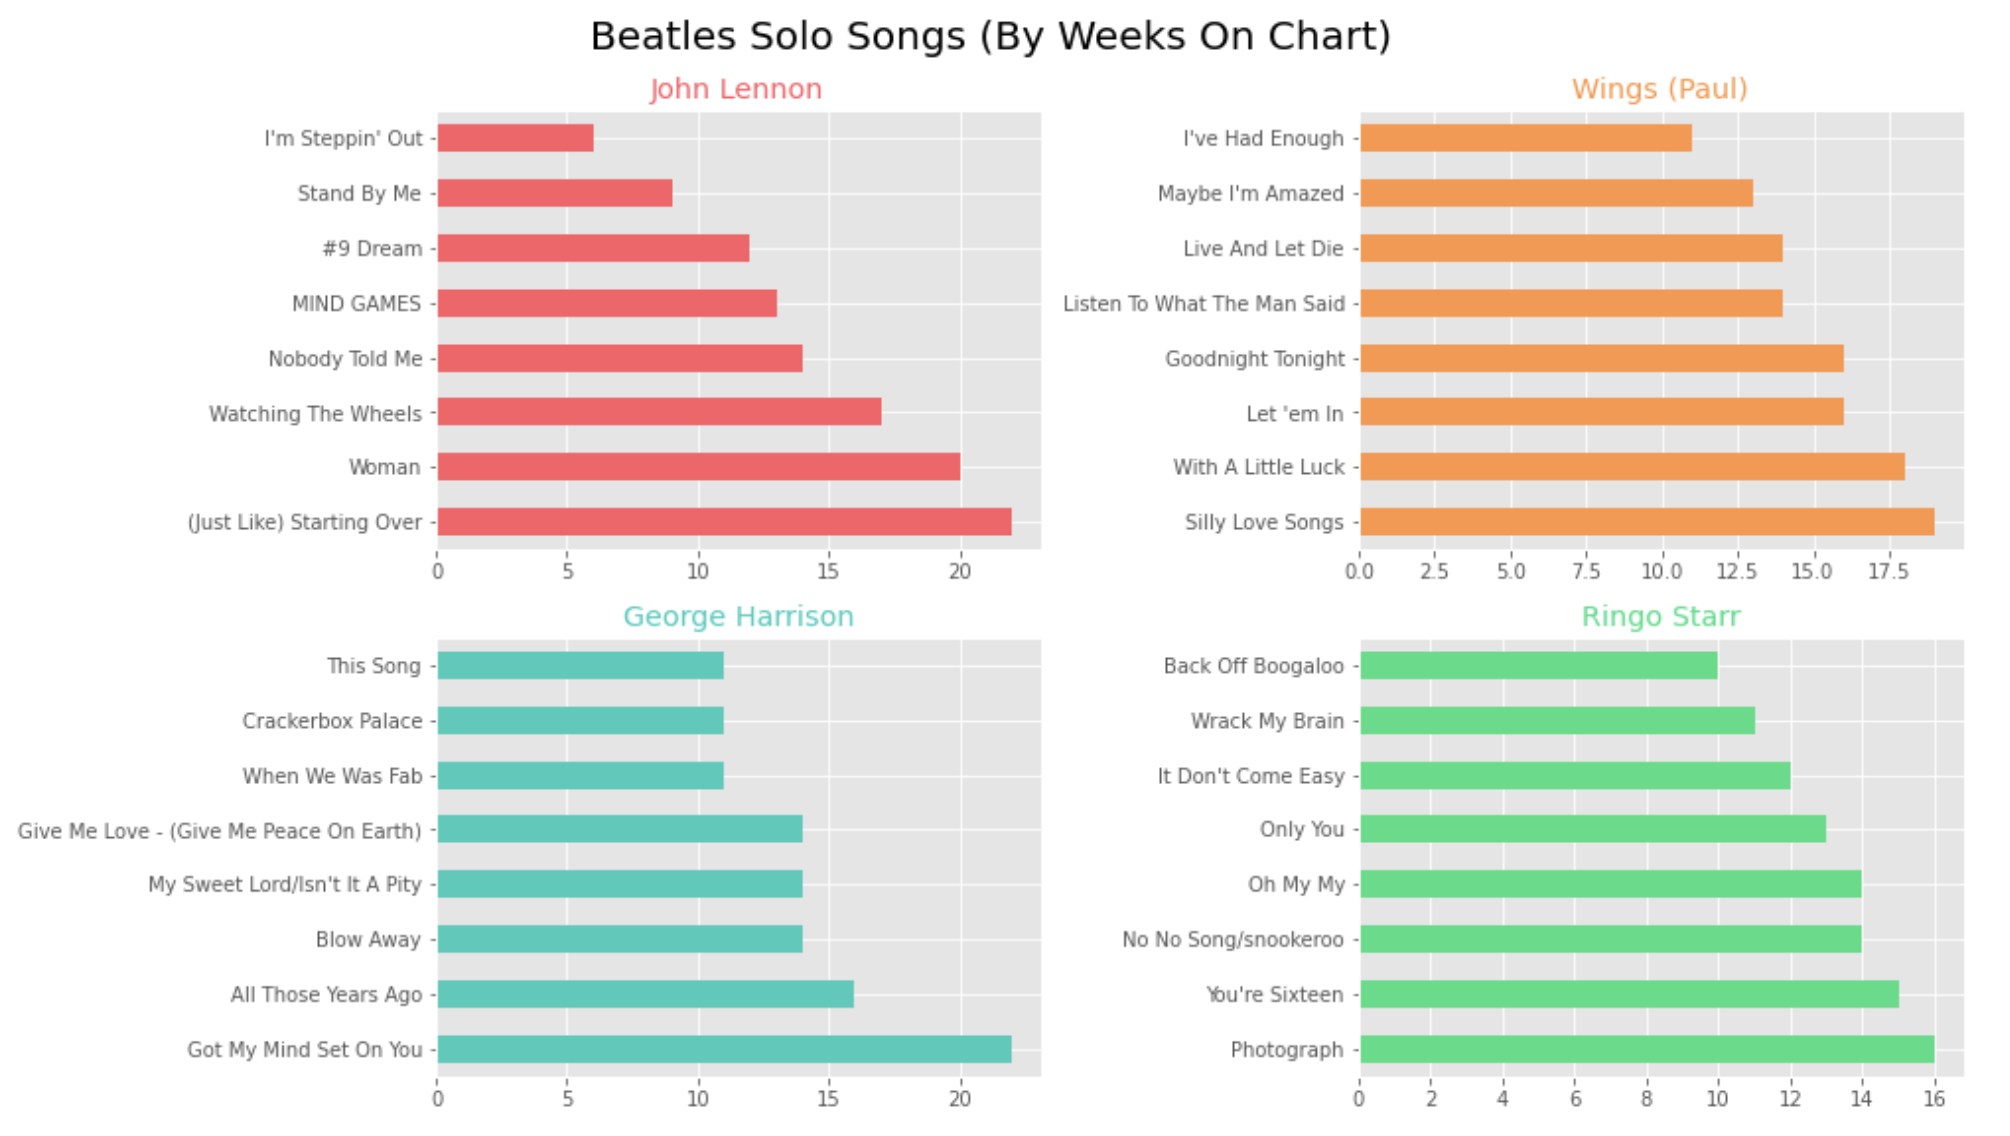

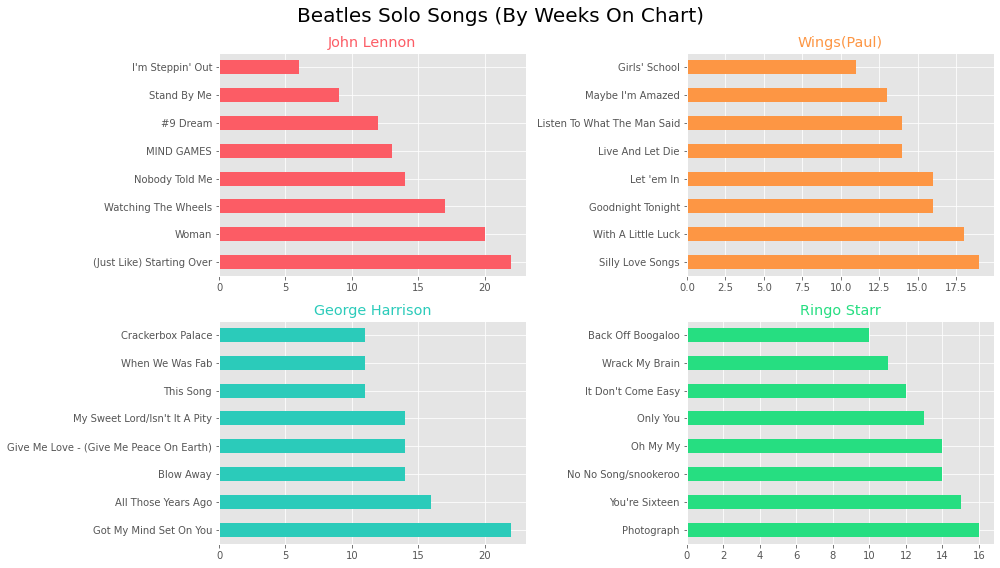

In [139]:
jl = billboard[billboard["artist"] == "John Lennon"]["song"].value_counts().head(8)
wings = billboard[billboard["artist"] == "Wings"]["song"].value_counts().head(8)
gh = billboard[billboard["artist"] == "George Harrison"]["song"].value_counts().head(8)
rs = billboard[billboard["artist"] == "Ringo Starr"]["song"].value_counts().head(8)

fig, axs = plt.subplots(2,2, figsize=(14,8))
fig.suptitle("Beatles Solo Songs (By Weeks On Chart)", fontsize=20 )

jl.plot(kind="barh", ax=axs[0][0], color="#fc5c65")
axs[0][0].set_title("John Lennon", color="#fc5c65")

wings.plot(kind="barh", ax=axs[0][1], color="#fd9644")
axs[0][1].set_title("Wings(Paul)", color="#fd9644")

gh.plot(kind="barh", ax=axs[1][0], color="#2bcbba")
axs[1][0].set_title("George Harrison", color="#2bcbba")

rs.plot(kind="barh", ax=axs[1][1], color="#26de81")
axs[1][1].set_title("Ringo Starr", color="#26de81")


plt.tight_layout()

